In [24]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from imutils import paths

In [25]:
# from tensorflow.keras.applications import MobileNetV2 
# from tensorflow.keras.layers import MaxPooling2D
# form tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Input
# from tensorflow.kera.layers import Model
# from tensorflow.keras.optimizer import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# from tensorflow.keras.preprocessing.image import ImageDataGeneraor
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


In [26]:
dataset = r'D:\Deep Learning\FaceMaskDetector\Mask Dataset'
imgpaths = list(paths.list_images(dataset))

In [27]:
imgpaths

['D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\0.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\1.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\10.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\100.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\101.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\102.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\104.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\105.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\106.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\107.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\108.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\109.jpg',
 'D:\\Deep Learning\\FaceMaskDetector\\Mask Dataset\\without_mask\\11.jpg',
 'D:\

In [28]:
data = []
labels = []

for i in imgpaths:
    label = i.split(os.path.sep)[-2] # os.path.sep is the character used by the operating system to separate pathname components.
    # It splits the labels name(with_mask and without_mask), which lies on the -2 index, from the filepath.
    labels.append(label)
    image = load_img(i, target_size = (224,224))
    image = img_to_array(image)
    # Data preprocessing
    images = preprocess_input(image)
    data.append(images)

In [29]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [30]:
images[0]

array([[ 0.6784314 ,  0.62352943,  0.48235297],
       [ 0.6627451 ,  0.62352943,  0.47450984],
       [ 0.654902  ,  0.6156863 ,  0.4666667 ],
       [ 0.67058825,  0.6156863 ,  0.4901961 ],
       [ 0.6784314 ,  0.6313726 ,  0.5058824 ],
       [ 0.6784314 ,  0.6392157 ,  0.4901961 ],
       [ 0.6784314 ,  0.62352943,  0.49803925],
       [ 0.69411767,  0.64705884,  0.52156866],
       [ 0.6862745 ,  0.6313726 ,  0.4901961 ],
       [ 0.67058825,  0.6156863 ,  0.47450984],
       [ 0.7019608 ,  0.64705884,  0.5058824 ],
       [ 0.6862745 ,  0.6313726 ,  0.4901961 ],
       [ 0.69411767,  0.6392157 ,  0.49803925],
       [ 0.7254902 ,  0.67058825,  0.5294118 ],
       [ 0.7019608 ,  0.64705884,  0.5058824 ],
       [ 0.7019608 ,  0.64705884,  0.5058824 ],
       [ 0.7176471 ,  0.64705884,  0.5137255 ],
       [ 0.7176471 ,  0.6627451 ,  0.52156866],
       [ 0.7254902 ,  0.67058825,  0.5294118 ],
       [ 0.7254902 ,  0.654902  ,  0.52156866],
       [ 0.7176471 ,  0.6627451 ,  0.521

In [31]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7490196 , -0.8039216 , -0.6784314 ],
         [-0.7490196 , -0.8039216 , -0.6784314 ],
         [-0.7411765 , -0.79607844, -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9529412 , -0.81960785],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.85882354, -0.8901961 , -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.38823533, -0.9607843 

In [33]:
# converting into numpy array
data = np.array(data, dtype = 'float32')
labels = np.array(labels)

In [34]:
data.shape

(1376, 224, 224, 3)

In [35]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [36]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
labels = to_categorical(labels)
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size = 0.2, random_state = 10, stratify = labels)

In [40]:
xtrain.shape

(1100, 224, 224, 3)

In [41]:
ytrain.shape

(1100, 2)

In [42]:
xtest.shape, ytest.shape

((276, 224, 224, 3), (276, 2))

In [43]:
# Generating more image data by using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
aug = ImageDataGenerator(rotation_range = 20, zoom_range = 15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

In [45]:
from tensorflow.keras.applications import MobileNetV2 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D

In [46]:
baseModel = MobileNetV2(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(224,224,3)))

In [47]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [48]:
headModel = baseModel.output
headModel = tf.keras.layers.AveragePooling2D(pool_size=(7,7))(headModel)
headModel = tf.keras.layers.Flatten(name = 'Flatten')(headModel)
headModel = tf.keras.layers.Dense(128, activation = 'relu')(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(2, activation='softmax')(headModel)

model = tf.keras.Model(inputs = baseModel.input, outputs = headModel)

In [49]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [50]:
for layer in baseModel.layers:
    layer.trainable = False

In [51]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [58]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.001),
             metrics = ['accuracy'])

model.fit(aug.flow(xtrain, ytrain, batch_size=15), 
                   epochs=20, validation_data=(xtest, ytest))


Epoch 1/20
74/74 [==============================] - 31s 388ms/step - loss: 0.8786 - accuracy: 0.5382 - val_loss: 0.5553 - val_accuracy: 0.6558
Epoch 2/20
74/74 [==============================] - 29s 395ms/step - loss: 0.6768 - accuracy: 0.5791 - val_loss: 0.5269 - val_accuracy: 0.7391
Epoch 3/20
74/74 [==============================] - 29s 387ms/step - loss: 0.6565 - accuracy: 0.5936 - val_loss: 0.4408 - val_accuracy: 0.9167
Epoch 4/20
74/74 [==============================] - 27s 368ms/step - loss: 0.6384 - accuracy: 0.6491 - val_loss: 0.3712 - val_accuracy: 0.9457
Epoch 5/20
74/74 [==============================] - 27s 368ms/step - loss: 0.6286 - accuracy: 0.6482 - val_loss: 0.3007 - val_accuracy: 0.9601
Epoch 6/20
74/74 [==============================] - 27s 370ms/step - loss: 0.6279 - accuracy: 0.6364 - val_loss: 0.2639 - val_accuracy: 0.9746
Epoch 7/20
74/74 [==============================] - 27s 369ms/step - loss: 0.6097 - accuracy: 0.6609 - val_loss: 0.2486 - val_accuracy: 0.9638

In [60]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.001),
             metrics = ['accuracy'])

h = model.fit(aug.flow(xtrain, ytrain, batch_size=30), 
                   epochs=20, validation_data=(xtest, ytest))


Epoch 1/20
37/37 [==============================] - 30s 747ms/step - loss: 0.5634 - accuracy: 0.6900 - val_loss: 0.1530 - val_accuracy: 0.9529
Epoch 2/20
37/37 [==============================] - 27s 724ms/step - loss: 0.5414 - accuracy: 0.7064 - val_loss: 0.1242 - val_accuracy: 0.9565
Epoch 3/20
37/37 [==============================] - 26s 709ms/step - loss: 0.5797 - accuracy: 0.6909 - val_loss: 0.1140 - val_accuracy: 0.9638
Epoch 4/20
37/37 [==============================] - 26s 712ms/step - loss: 0.5570 - accuracy: 0.7036 - val_loss: 0.1077 - val_accuracy: 0.9819
Epoch 5/20
37/37 [==============================] - 27s 716ms/step - loss: 0.5401 - accuracy: 0.7191 - val_loss: 0.1148 - val_accuracy: 0.9601
Epoch 6/20
37/37 [==============================] - 27s 716ms/step - loss: 0.5297 - accuracy: 0.7264 - val_loss: 0.0903 - val_accuracy: 0.9783
Epoch 7/20
37/37 [==============================] - 26s 715ms/step - loss: 0.5435 - accuracy: 0.7118 - val_loss: 0.1210 - val_accuracy: 0.9529

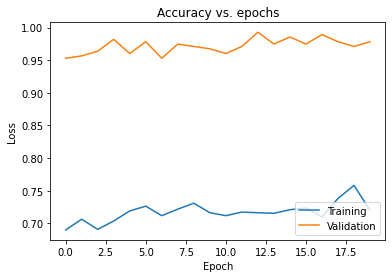

In [66]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

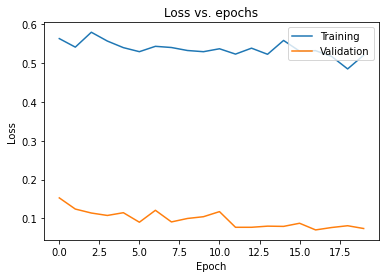

In [68]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

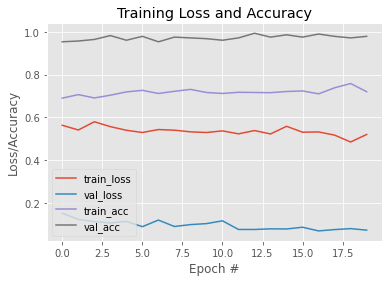

In [73]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [74]:
model.save(r'D:\Deep Learning\FaceMaskDetector\maskdetector.model')

INFO:tensorflow:Assets written to: D:\Deep Learning\FaceMaskDetector\maskdetector.model\assets


C:\Users\poude\anaconda3\envs\tfEnv\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
